In [1]:
from WEB import *

In [2]:
START_RAD = 0
MAX_RAD = 1
GAP = 0.2

#點個數乘以６
PONITS_NUM = 100
#組個數
IN_GROUP_NUM = 50
#汙染間隔
CONTAMINATED = 0.1
#汙染的個數
NUM = int(0.5 / CONTAMINATED)

#汙染BETA (正確是[-6, 6]抽出) None就是原本資料的值
CONTAMINATED_BETA0 = -4
CONTAMINATED_BETA1 = None

In [6]:
#存WEB的MSE
mse_0_WEB = np.zeros(NUM)
mse_1_WEB = np.zeros(NUM)
mse_hyper_WEB = np.zeros(NUM)

mse_0_WEB_wo_lambdas = np.zeros(NUM)
mse_1_WEB_wo_lambdas = np.zeros(NUM)
mse_hyper_WEB_wo_lambdas = np.zeros(NUM)
#存MDPDE的MSE
mse_0_MDPDE = np.zeros(NUM)
mse_1_MDPDE = np.zeros(NUM)
#存WEIGHTS
weights = np.zeros(NUM)
#初始設定
web = WEB(start_radius=START_RAD, max_radius=MAX_RAD, gap=GAP)

for j in tqdm(range(NUM)):
    contained_ratio_data = CONTAMINATED * j
    #造資料
    web.create_data(
        group_num=1, 
        group_name=["A"], 
        contained_ratio_data=contained_ratio_data, 
        contained_ratio_beta=0, 
        in_group_num=IN_GROUP_NUM,
        points_num=PONITS_NUM, 
        contaminated_beta0=CONTAMINATED_BETA0, 
        contaminated_beta1=CONTAMINATED_BETA1
        )
    web.paramters_initial()
    web.WEB_iter_test2(max_iter=20, alpha=0.5, gamma=0.5, verbose=False)
    mse_0_WEB[j], mse_1_WEB[j] = np.sum((web.betas["A"] - web.betas_WEB["A"])**2, axis=0)
    mse_0_WEB_wo_lambdas[j], mse_1_WEB_wo_lambdas[j] = np.sum((web.betas["A"] - web.betas_WEB_wo_lambdas["A"])**2, axis=0)
    mse_0_MDPDE[j], mse_1_MDPDE[j] = np.sum((web.betas["A"] - web.betas_WLR["A"])**2, axis=0)
    mse_hyper_WEB[j] = np.sum((web.mus["A"] - web.mus_mle["A"])**2) / 2
    mse_hyper_WEB_wo_lambdas[j] = np.sum((web.mus["A"] - web.mus_mle_wo_lambdas["A"])**2) / 2
    weights[j] = np.mean(web.weights["A"])

100%|██████████| 5/5 [00:53<00:00, 10.71s/it]


In [10]:
web.lambdas

{'A': array([0.57852814, 1.23615284, 0.88482356, 0.690825  , 0.96135851,
        1.26763691, 1.22034784, 1.38361076, 0.97859251, 1.15094269,
        0.93901987, 1.44843663, 0.73152078, 0.95956213, 1.84652946,
        2.4602422 , 1.71172966, 1.06990648, 1.16065558, 0.813716  ,
        1.41290424, 2.1394387 , 2.18751013, 0.8889875 , 1.12281565,
        1.46740734, 1.65319711, 1.18650089, 1.52982586, 3.54260912,
        0.72635113, 0.69536315, 1.23531635, 2.26897395, 3.11634669,
        0.86882336, 1.08887169, 2.49261343, 1.74626511, 1.68791208,
        1.43467877, 1.09646723, 0.98622314, 1.62142157, 0.98567062,
        0.9696096 , 0.9793493 , 1.9411932 , 1.66999151, 0.78892418])}

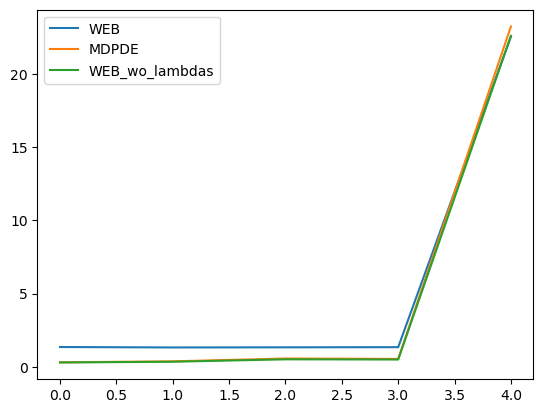

In [8]:
plt.plot(mse_0_WEB + mse_1_WEB, label="WEB")
plt.plot(mse_0_MDPDE + mse_1_MDPDE, label="MDPDE")
plt.plot(mse_0_WEB_wo_lambdas + mse_1_WEB_wo_lambdas, label="WEB_wo_lambdas")
plt.legend()

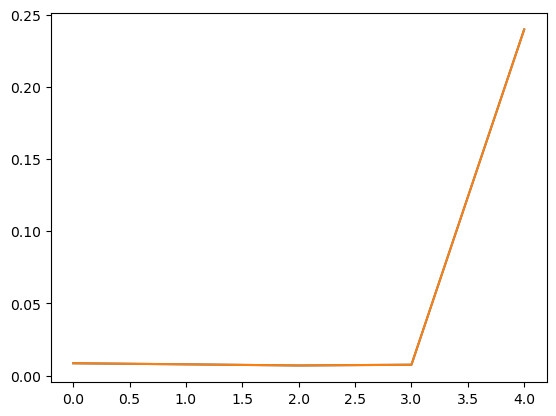

In [11]:
plt.plot(mse_hyper_WEB_wo_lambdas, label='WEB_wo_lambdas')
plt.plot(mse_hyper_WEB, label='WEB')

In [13]:
#存WEB的MSE
mse_0_WEB = np.zeros((NUM, NUM))
mse_1_WEB = np.zeros((NUM, NUM))
mse_hyper_WEB = np.zeros((NUM, NUM))

mse_0_WEB_wo_lambdas = np.zeros((NUM, NUM))
mse_1_WEB_wo_lambdas = np.zeros((NUM, NUM))
mse_hyper_WEB_wo_lambdas = np.zeros((NUM, NUM))
#存MDPDE的MSE
mse_0_MDPDE = np.zeros((NUM, NUM))
mse_1_MDPDE = np.zeros((NUM, NUM))
#存WEIGHTS
weights = np.zeros((NUM, NUM))
#初始設定
web = WEB(start_radius=START_RAD, max_radius=MAX_RAD, gap=GAP)

for i in tqdm(range(NUM)):
    contained_ratio_beta = CONTAMINATED * i
    for j in range(NUM):
        contained_ratio_data = CONTAMINATED * j
        #造資料
        web.create_data(
            group_num=1, 
            group_name=["A"], 
            contained_ratio_data=contained_ratio_data, 
            contained_ratio_beta=contained_ratio_beta, 
            in_group_num=IN_GROUP_NUM,
            points_num=PONITS_NUM, 
            contaminated_beta0=CONTAMINATED_BETA0, 
            contaminated_beta1=CONTAMINATED_BETA1
            )
        web.paramters_initial()
        web.WEB_iter_test2(max_iter=20, alpha=0.5, gamma=0.5, verbose=False)
        
        mse_0_WEB[i][j], mse_1_WEB[i][j] = np.sum((web.betas["A"] - web.betas_WEB["A"])**2, axis=0)
        mse_0_WEB_wo_lambdas[i][j], mse_1_WEB_wo_lambdas[i][j] = np.sum((web.betas["A"] - web.betas_WEB_wo_lambdas["A"])**2, axis=0)
        mse_0_MDPDE[i][j], mse_1_MDPDE[i][j] = np.sum((web.betas["A"] - web.betas_WLR["A"])**2, axis=0)
        mse_hyper_WEB[i][j] = np.sum((web.mus["A"] - web.mus_mle["A"])**2) / 2
        mse_hyper_WEB_wo_lambdas[i][j] = np.sum((web.mus["A"] - web.mus_mle_wo_lambdas["A"])**2) / 2
        weights[i][j] = np.mean(web.weights["A"])

100%|██████████| 5/5 [04:23<00:00, 52.79s/it]


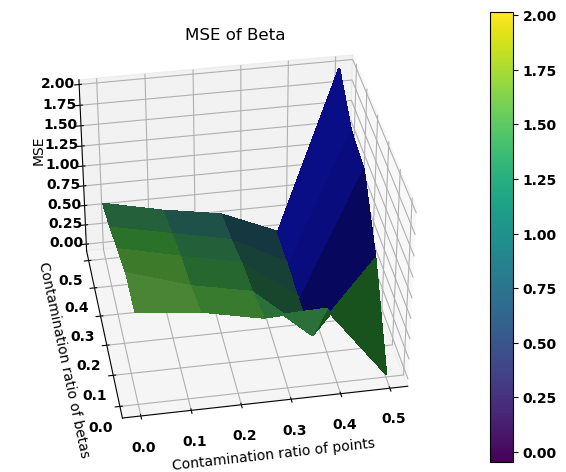

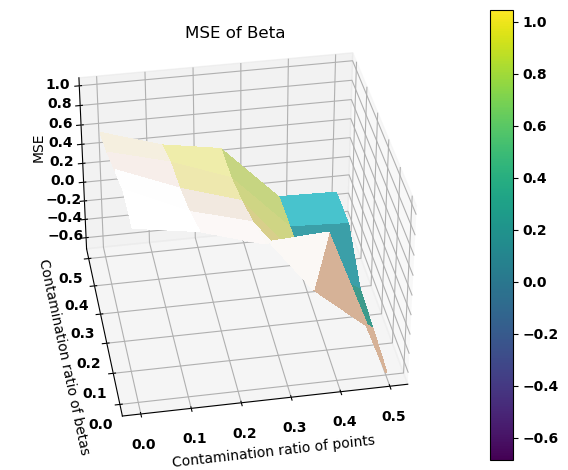

In [18]:
simulation_plot(mse_0_WEB + mse_1_WEB - (mse_0_WEB_wo_lambdas + mse_1_WEB_wo_lambdas), "MSE", "MSE of Beta")
simulation_plot(mse_0_WEB + mse_1_WEB - (mse_0_MDPDE + mse_1_MDPDE), "MSE", "MSE of Beta")

In [16]:
web = WEB(start_radius=START_RAD, max_radius=MAX_RAD, gap=GAP)
web.create_data(
        group_num=1, 
        group_name=["A"], 
        contained_ratio_data=0.2, 
        contained_ratio_beta=0, 
        in_group_num=5,
        points_num=5, 
        contaminated_beta0=CONTAMINATED_BETA0, 
        contaminated_beta1=CONTAMINATED_BETA1
        )

{'A': array([[ -6.38691007,  -6.18039943,  -6.57327185,  -6.14806294,
          -6.2572475 ,  -6.18406839,  -6.25172998,  -6.46216792,
          -6.47737241,  -5.9190207 ,  -6.78950873,  -6.78291528,
          -6.33300976,  -6.31003135,  -6.61791681,  -7.41314223,
          -7.80334141,  -7.20163177,  -6.89240149,  -7.64162161,
          -8.3325042 ,  -8.53527099,  -7.66318129,  -8.18490142,
          -8.51090873,  -8.2467329 ,  -9.26445991, -10.19547462,
          -9.50196628,  -9.59089868],
        [ -5.85370499,  -6.14861773,  -5.53378295,  -5.72084763,
          -6.11758571,  -5.55835476,  -6.00084536,  -5.69104144,
          -5.47234601,  -5.66616088,  -6.50399106,  -6.45682299,
          -5.9280722 ,  -6.27918615,  -6.3392538 ,  -7.02638217,
          -6.7422982 ,  -7.53089658,  -7.11057908,  -6.35073999,
          -7.84397105,  -7.95495944,  -6.97814758,  -6.84649436,
          -7.07809698,  -8.42579517,  -8.85521262,  -8.1688421 ,
          -8.63960782,  -8.11458583],
        [

In [20]:
web.paramters_initial()
_ = web.WEB_iter_test2(max_iter=20, alpha=0.5, gamma=10, verbose=False, Lin=True)

In [21]:
web.betas_WLR

{'A': array([[-6.22396973,  6.59076751],
        [-5.79191853,  5.2888147 ],
        [-5.38394921,  5.70614326],
        [-5.87952265,  6.14264703],
        [-6.20608951,  5.88301794]])}

In [22]:
web.betas_WEB

{'A': array([[-6.25865219,  6.29690852],
        [-5.72993935,  5.72279472],
        [-5.38338467,  5.86231457],
        [-5.89222094,  6.10141511],
        [-6.17329463,  6.02545206]])}

In [33]:
denominate = web.Xs_tilde[name][pos].T @ np.diag(web.weights[name][pos]) @ web.Xs_tilde[name][pos] + np.eye(2)
nominate = web.Xs_tilde[name][pos].T @ np.diag(web.weights[name][pos]) @ web.data_log[name][pos] + web.mus_mle[name]

In [34]:
np.linalg.inv(denominate) @ nominate

array([-6.25865219,  6.29690852])

In [23]:
web.betas

{'A': array([[-6.26787674,  6.62617998],
        [-5.59108571,  5.83661866],
        [-5.18698372,  6.34524494],
        [-5.84610585,  6.18402663],
        [-6.05708005,  6.44329448]])}